# <center> Trocatine 🐰 </center>
### <center> Teste A/B </center>

## 0. Configurações e Variáveis

### 0.1. Importações

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import pickle

### 0.2. Variáveis

In [20]:
modelos_before = pickle.load(open('./modelos_before.pk1','rb'))
modelos_after = pickle.load(open('./modelos_after.pk1','rb'))

In [27]:
# Leitura do teste A
teste_b = modelos_before['tree'][-1]

# Leitura do teste B 
teste_a = modelos_after['knn']['tempo_execucao']

print(teste_b)
print(teste_a)

[0.027779800000644173, 0.02602599999954691, 0.021471400001246366, 0.018629399999554153, 0.022458800000094925, 0.021002900000894442]
[0, 0.03315179999844986, 0.028251200001250254, 0.019164100001944462, 0.01984499999889522, 0.03355329999976675, 0.017156900001282338]


In [22]:
significancia = 0.05
confianca = 0.95
tcritico = 1.697 # Tirado da tabela

## 1. Teste A

In [23]:
# Calculando as médias
media_A = np.mean(teste_a)
media_B = np.mean(teste_b)

# Calculando erro padrão para intervalos de confiança
erro_padrao_A = np.sqrt((media_A * (1 - media_A)) / teste_a)
erro_padrao_B = np.sqrt((media_B * (1 - media_B)) / teste_b)

# Intervalos de confiança de 95%
intervalo_A = norm.interval(confianca, loc=media_A, scale=erro_padrao_A)
intervalo_B = norm.interval(confianca, loc=media_B, scale=erro_padrao_B)

C:\Users\sarahbatista-ieg\AppData\Local\Temp\ipykernel_18772\568337963.py:6: RuntimeWarning: divide by zero encountered in divide
  erro_padrao_A = np.sqrt((media_A * (1 - media_A)) / teste_a)


In [24]:
# Realizar o teste t
t_stat, p_valor = stats.ttest_ind(teste_b, teste_a)

print(f'Estatística t: {t_stat}')
print(f'Valor p: {p_valor}')

if p_valor < significancia:
    print("A diferença é estatisticamente significativa, o que nos permite rejeitar a hipótese nula.")
else:
    print("A diferença não é estatisticamente significativa, portanto, não podemos rejeitar a hipótese nula.")

Estatística t: 0.26338526407585083
Valor p: 0.7971221449584425
A diferença não é estatisticamente significativa. Não podemos rejeitar a hipótese nula.


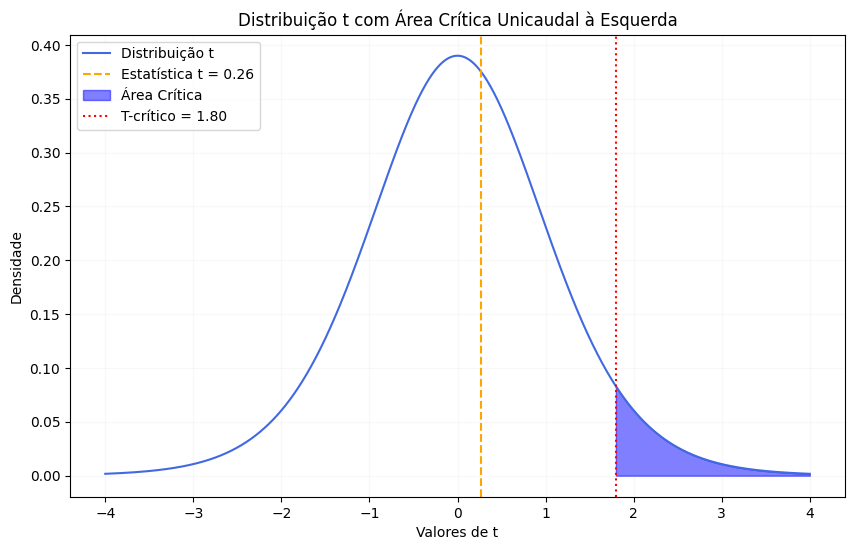

In [25]:
# Definir o número de graus de liberdade
df = len(teste_a) + len(teste_b) - 2

# Definir o valor crítico t para o nível de significância (unilateral à esquerda)
t_critical = stats.t.ppf(1 - significancia, df)

# Criando os valores para a distribuição t
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição t', color='royalblue')
plt.axvline(t_stat, color='orange', linestyle='--', label=f'Estatística t = {t_stat:.2f}')
plt.fill_between(x, 0, y, where=(x >= t_critical), color='blue', alpha=0.5, label=f'Área Crítica')
plt.axvline(t_critical, color='red', linestyle=':', label=f'T-crítico = {t_critical:.2f}')

# Personalização do gráfico
plt.title('Distribuição t com Área Crítica Unicaudal à Esquerda')
plt.xlabel('Valores de t')
plt.ylabel('Densidade')
plt.legend(loc='upper left')

# Diminuindo a opacidade da grade
plt.grid(True, alpha=0.08)

# Exibir o gráfico
plt.show()

C:\Users\sarahbatista-ieg\AppData\Local\Temp\ipykernel_18772\416980111.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Modelo', y='Performace', data=dois, palette="Set2")


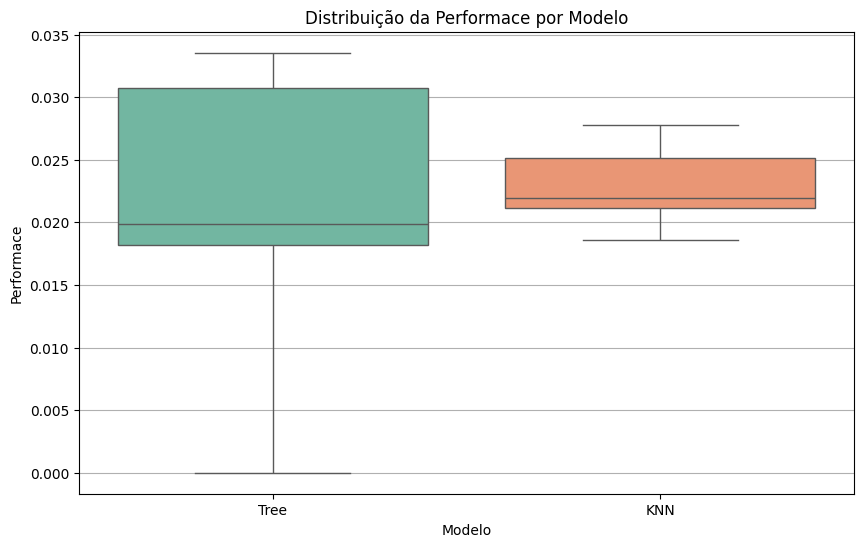

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Modelo', y='Performace', data=dois, palette="Set2")
plt.title('Distribuição da Performace por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Performace')
plt.grid(axis='y')